In [ ]:
# Import necessary libraries
import pandas as pd

# Load the data
data = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Inspect the first few rows of the dataset
data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [ ]:
# Check for missing or null values
data.isna().sum()

# Check for non-null values to verify the completeness
data.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [ ]:
# Handling missing values by either dropping or filling them
# In this case, let's assume we drop rows with missing values
data_clean = data.dropna()

# Alternatively, we can fill missing values if necessary
# data.fillna(value={'column_name': 'default_value'}, inplace=True)

# Check if the missing data is handled
data_clean.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [ ]:
# Normalize numerical columns using Min-Max normalization
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns to normalize
numerical_cols = ['Unit', 'Sales']
data_clean[numerical_cols] = scaler.fit_transform(data_clean[numerical_cols])

# Check the normalized data
data_clean.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


In [ ]:
# Group by State and Group to summarize the sales
grouped_data = data_clean.groupby(['State', 'Group']).agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()

# The GroupBy function can be useful for aggregating data by certain categories such as Group, State, etc.
grouped_data.head()

,State,Group,Sales,Unit
0,NSW,Kids,109.444444,109.444444
1,NSW,Men,112.206349,112.206349
2,NSW,Seniors,106.904762,106.904762
3,NSW,Women,113.158730,113.158730
4,NT,Kids,27.619048,27.619048


In [ ]:
# Descriptive statistics for Sales and Unit
sales_stats = data_clean['Sales'].describe()
unit_stats = data_clean['Unit'].describe()

sales_stats, unit_stats

(count    7560.000000
 mean        0.254054
 std         0.204784
 min         0.000000
 25%         0.095238
 50%         0.190476
 75%         0.380952
 max         1.000000
 Name: Sales, dtype: float64,
 count    7560.000000
 mean        0.254054
 std         0.204784
 min         0.000000
 25%         0.095238
 50%         0.190476
 75%         0.380952
 max         1.000000
 Name: Unit, dtype: float64)

In [ ]:
# Find the group with the highest sales
highest_sales_group = data_clean.groupby('Group')['Sales'].sum().idxmax()

# Find the group with the lowest sales
lowest_sales_group = data_clean.groupby('Group')['Sales'].sum().idxmin()

highest_sales_group, lowest_sales_group

(' Men', ' Seniors')

In [ ]:
# Convert Date column to datetime type
data_clean['Date'] = pd.to_datetime(data_clean['Date'])

# Set the Date as the index for resampling
data_clean.set_index('Date', inplace=True)

# Generate Weekly, Monthly, and Quarterly Sales Reports
weekly_sales = data_clean.resample('W')['Sales'].sum()
monthly_sales = data_clean.resample('M')['Sales'].sum()
quarterly_sales = data_clean.resample('Q')['Sales'].sum()

weekly_sales, monthly_sales, quarterly_sales

/tmp/ipykernel_29874/2344569072.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data_clean.resample('M')['Sales'].sum()
/tmp/ipykernel_29874/2344569072.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = data_clean.resample('Q')['Sales'].sum()


(Date
 2020-10-04     84.857143
 2020-10-11    152.777778
 2020-10-18    150.476190
 2020-10-25    151.587302
 2020-11-01    122.460317
 2020-11-08    113.809524
 2020-11-15    115.761905
 2020-11-22    115.380952
 2020-11-29    117.698413
 2020-12-06    169.412698
 2020-12-13    181.492063
 2020-12-20    182.317460
 2020-12-27    183.047619
 2021-01-03     79.571429
 Freq: W-SUN, Name: Sales, dtype: float64,
 Date
 2020-10-31    645.650794
 2020-11-30    495.761905
 2020-12-31    779.238095
 Freq: ME, Name: Sales, dtype: float64,
 Date
 2020-12-31    1920.650794
 Freq: QE-DEC, Name: Sales, dtype: float64)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up Seaborn style
sns.set(style="whitegrid")

/tmp/ipykernel_29874/1857814285.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Sales', hue='Group', data=data_clean, ci=None)


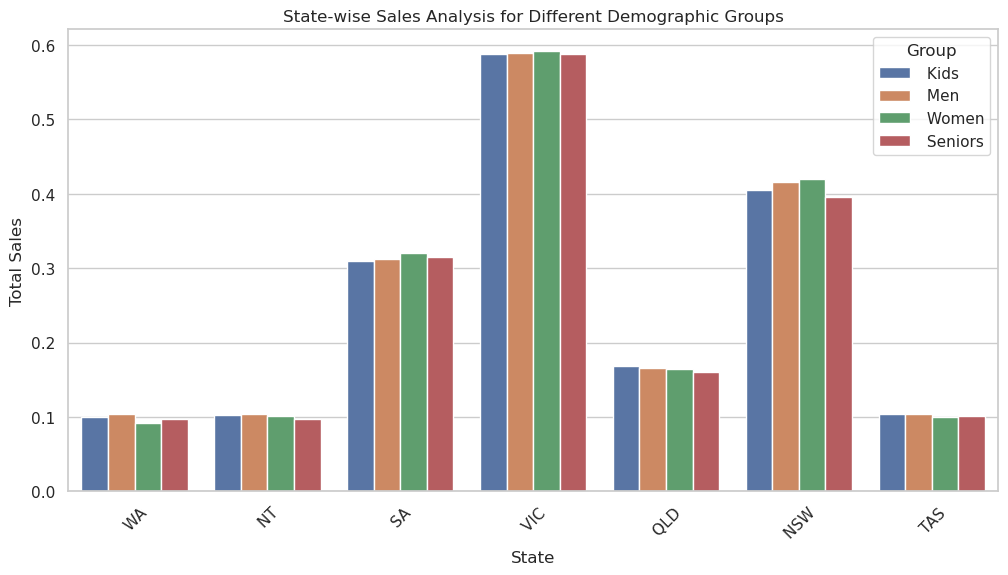

In [ ]:
# State-wise sales for different demographic groups (Kids, Men, Women, Seniors)
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=data_clean, ci=None)
plt.title('State-wise Sales Analysis for Different Demographic Groups')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_29874/1690979293.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Group', y='Sales', hue='State', data=data_clean, ci=None)


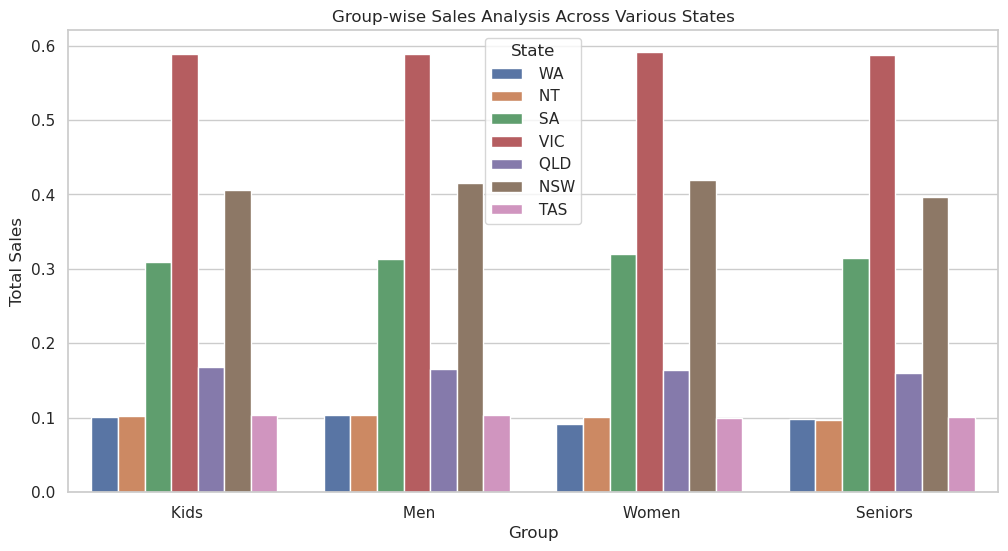

In [ ]:
# Group-wise sales across various states
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=data_clean, ci=None)
plt.title('Group-wise Sales Analysis Across Various States')
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.show()

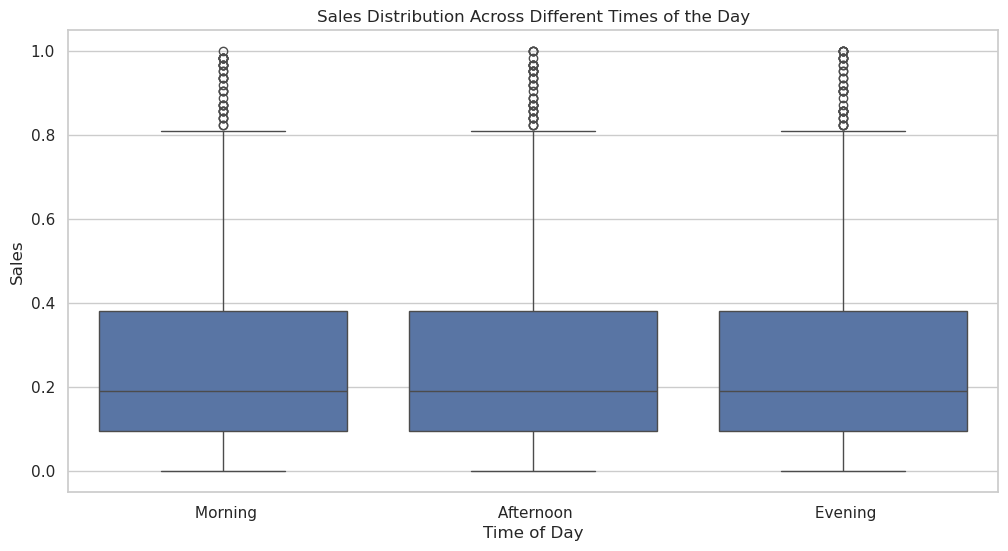

In [ ]:
# Time-of-the-day sales analysis to identify peak and off-peak periods
plt.figure(figsize=(12, 6))
sns.boxplot(x='Time', y='Sales', data=data_clean)
plt.title('Sales Distribution Across Different Times of the Day')
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.show()

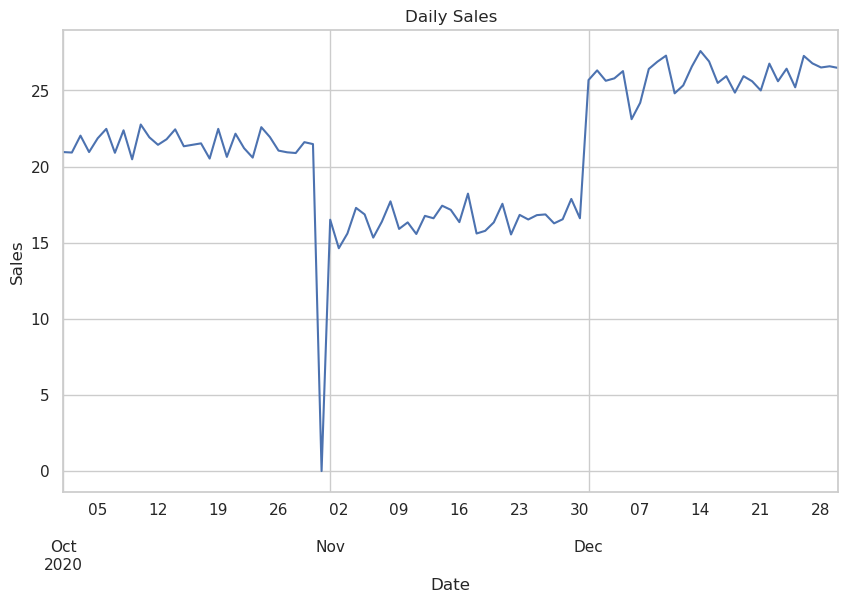

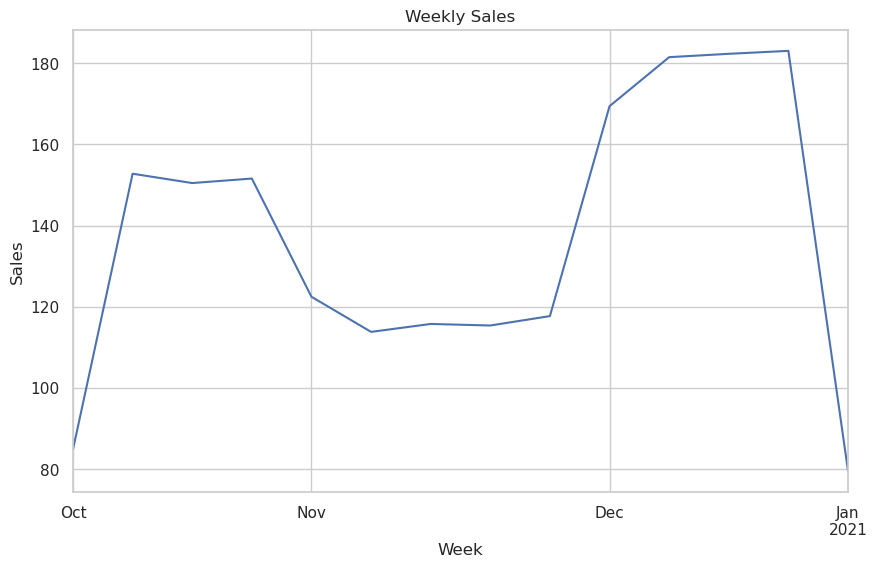

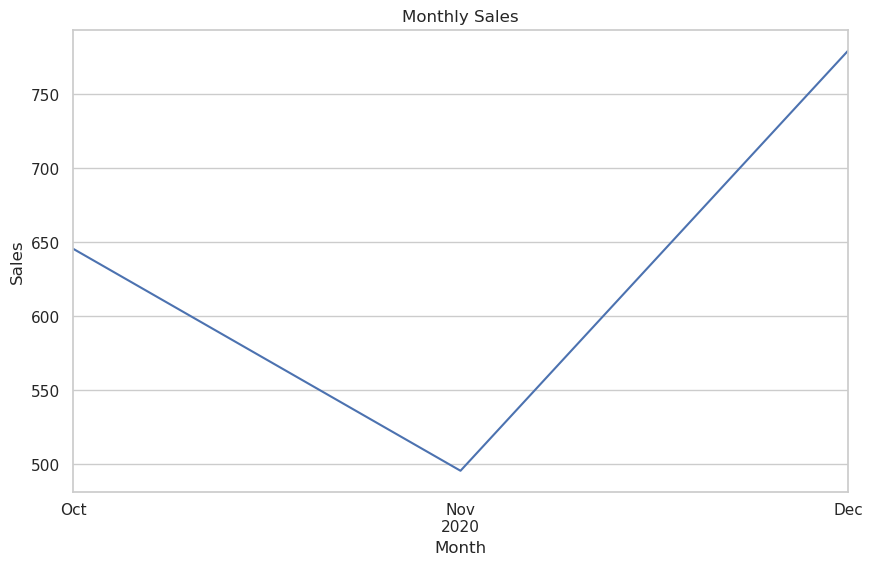

/opt/saturncloud/envs/saturn/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


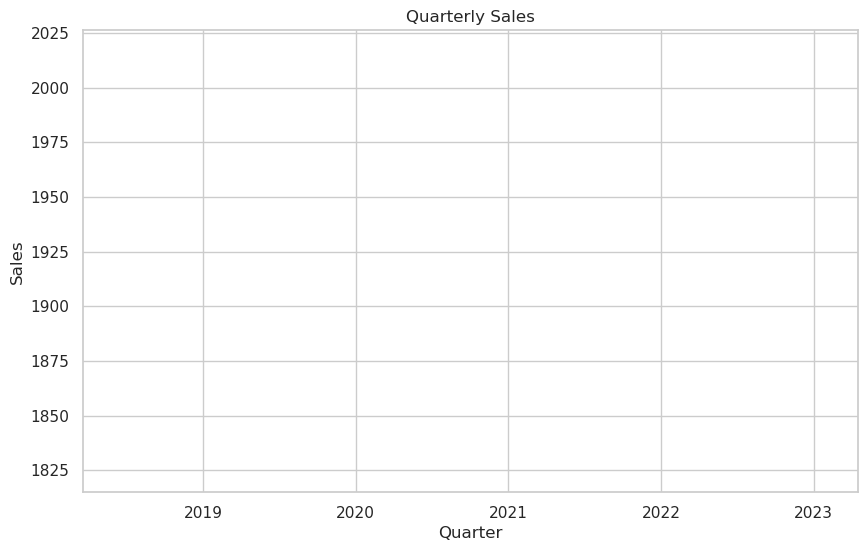

In [ ]:
# Plot Daily Sales
daily_sales = data_clean.resample('D')['Sales'].sum()
plt.figure(figsize=(10, 6))
daily_sales.plot(title='Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Plot Weekly Sales
plt.figure(figsize=(10, 6))
weekly_sales.plot(title='Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

# Plot Monthly Sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Plot Quarterly Sales
plt.figure(figsize=(10, 6))
quarterly_sales.plot(title='Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()